In [3]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from textblob import TextBlob
from wordcloud import WordCloud 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
data = pd.read_csv('/content/sample_data/WomenAfg-tweets.csv')
data

,date,day,hour,tweet_id,content,hashtags,user_name,retweetCount,lang,likeCount,viewCount,followersCount,friendsCount,sourceLabel,retweetedTweet,location,coordinates,media,quoteCount,quotedTweet
0,2023-04-18 18:47:00+00:00,18,18,1648397736448761917,"@drninaansary Yeah, destroy someone else's hou...",NaN,THEONE97863547,0,en,0,8.0,3,1,Twitter Web App,NaN,NaN,NaN,NaN,0,NaN
1,2023-04-18 18:28:50+00:00,18,18,1648393161905938443,Health care workers see a bleak future for wom...,NaN,ZahraYusufi,3,en,6,323.0,11115,1269,Twitter Web App,NaN,"Toronto, Ontario",NaN,NaN,0,https://twitter.com/ZanTimes/status/1648017039...
2,2023-04-18 17:08:43+00:00,18,17,1648373001610575874,Even if the UN leaves there is still a need fo...,NaN,ShafiqaKhplwak,4,en,16,1785.0,240533,1598,Twitter for iPhone,NaN,kabul afghanistan,NaN,NaN,2,NaN
3,2023-04-18 15:50:48+00:00,18,15,1648353391280619524,@US4AfghanPeace These meetings should also inc...,NaN,Abdulra95272791,0,en,0,25.0,159,350,Twitter for Android,NaN,Afghanistan,NaN,NaN,0,NaN
4,2023-04-18 15:09:27+00:00,18,15,1648342988018311168,"My meeting with Mr. Thomas West, the US Specia...",['womeninafghanistan'],zakirahekmat,0,en,1,90.0,2835,1963,Twitter Web App,NaN,Turkey,NaN,NaN,0,https://twitter.com/US4AfghanPeace/status/1648...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023-01-15 07:44:51+00:00,15,7,1614529029486383104,@TheDryhtscipe Well maybe they are speaking on...,NaN,Berathe,0,en,1,46.0,1458,1382,Twitter for Android,NaN,London,NaN,NaN,0,NaN
4996,2023-01-15 07:36:14+00:00,15,7,1614526858829365249,"Today, 14th January, we gathered at Westlake p...",['LetHerLearn'],FarishtaAfzaly,0,en,3,340.0,3543,1737,Twitter for iPhone,NaN,"Iowa, USA","Coordinates(longitude=-122.436232, latitude=47...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,0,NaN
4997,2023-01-15 06:58:33+00:00,15,6,1614517376783114240,"""Masoudeh Kohestani, a human rights activist o...",NaN,Plz_Support_PUP,3,en,3,119.0,365,1075,Twitter for Android,NaN,NaN,NaN,NaN,0,https://twitter.com/AmuTelevision/status/16142...
4998,2023-01-15 06:38:22+00:00,15,6,1614512298290479106,@GemsOfBollywood The fundamental problems of t...,NaN,_Deep_Think,0,en,4,309.0,119,92,Twitter Web App,NaN,India that is Bharat,NaN,NaN,0,NaN


Cleaning Tweets

In [16]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def Tweettxt_Cleaning (tweet,stemmer = PorterStemmer(),stop_words = set(stopwords.words("english"))):
  '''Make text lowercase,remove numbers, remove eamils, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.'''
  tweet = tweet.lower()
  tweet = re.sub(r'[~^0-9]', '', tweet)
  tweet = re.sub(r'[\w\.-]+@[\w\.-]+', '', tweet)
  tweet = re.sub('\[.*?\]', '', tweet)
  tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
  tweet = re.sub('<.*?>+', '', tweet)
  tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
  tweet = re.sub('\n', '', tweet)
  tweet = re.sub('\w*\d\w*', '', tweet)
  clean_tweet = []
  #removing stopwords and Stemmizing
  for word in str(tweet).split():
    if word not in stop_words and word.isalpha():
      clean_tweet.append(stemmer.stem(word)) 
        
  return " ".join(clean_tweet)

data['content'] = data['content'].apply(lambda tweet: Tweettxt_Cleaning(tweet))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentimate Analysis

In [17]:
def Sentiment_Analyzer(newTweets):
    Sentiment_DF = pd.DataFrame(columns=['text','subjectivity','polarity', 'sentiment'])
    rows = [[i, TextBlob(i).sentiment.subjectivity, TextBlob(i).sentiment.polarity, "positive" if TextBlob(i).sentiment.polarity > 0 else "negative" if TextBlob(i).sentiment.polarity < 0 else "neutral"] for i in newTweets]
    Sentiment_DF = Sentiment_DF.append(pd.DataFrame(rows, columns=Sentiment_DF.columns), ignore_index=True)
    return Sentiment_DF


In [18]:
def Sentiment_Visualizer(subset):

    tokens = [word.lower() for tweet in subset['text'] for word in nltk.word_tokenize(tweet)]
    fdist = nltk.FreqDist(tokens)

    fdist.plot(30, cumulative=False, color='green')

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='black', colormap='tab20b', 
                          width=600, height=400, margin=10).generate_from_frequencies(fdist)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='gaussian')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()



<ipython-input-17-81f8fc9bc955>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sentiment_DF = Sentiment_DF.append(pd.DataFrame(rows, columns=Sentiment_DF.columns), ignore_index=True)


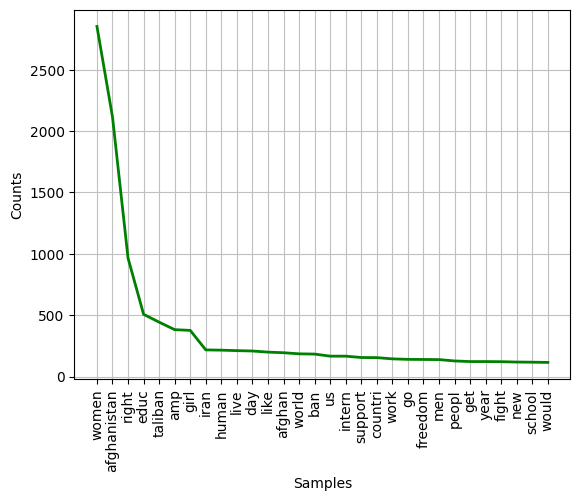

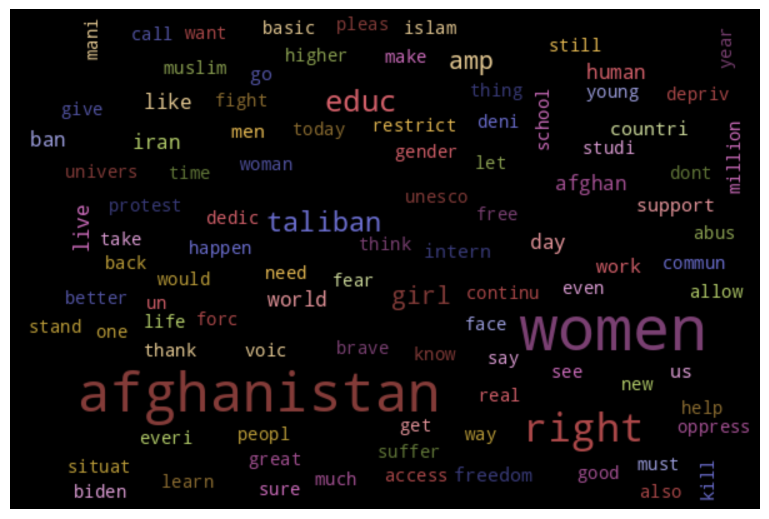

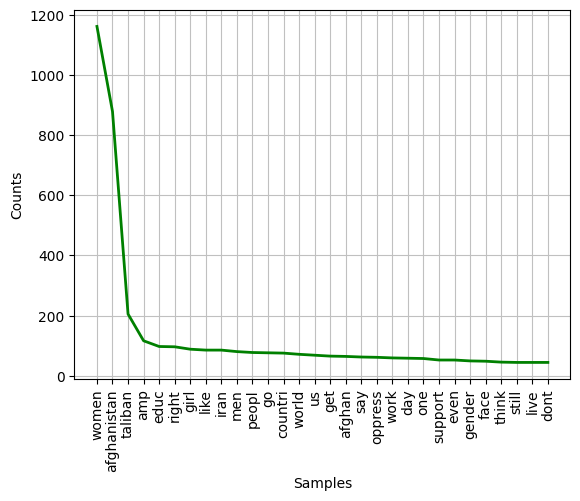

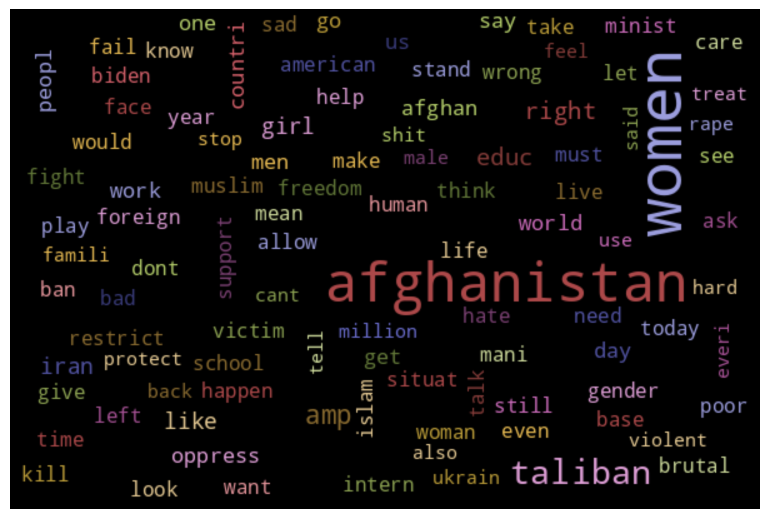

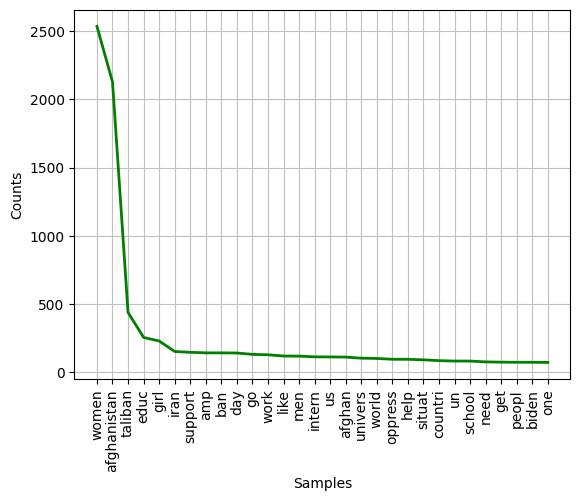

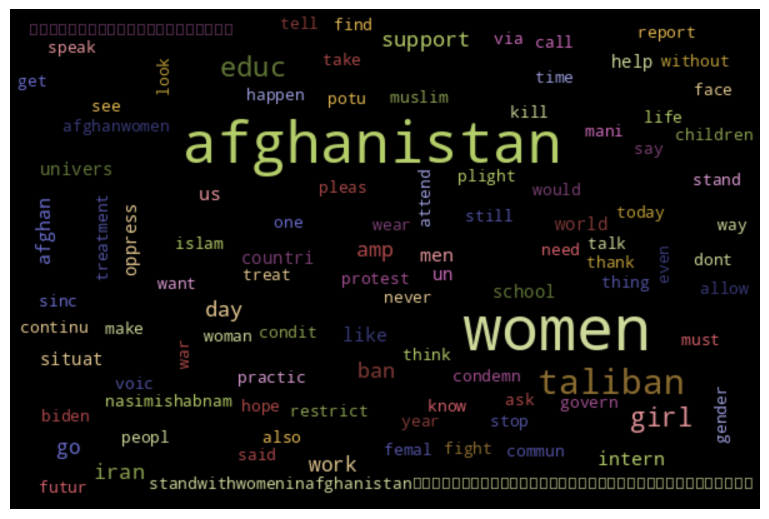

In [19]:
cleanTweets=data['content']
SentimentDF = Sentiment_Analyzer(cleanTweets)
    
#Call visualiser function to plot a wordcloud and a frequency distribution
Sentiment_Visualizer(SentimentDF[SentimentDF["sentiment"] == "positive"])
Sentiment_Visualizer(SentimentDF[SentimentDF["sentiment"] == "negative"])
Sentiment_Visualizer(SentimentDF[SentimentDF["sentiment"] == "neutral"])

Text(0, 0.5, 'Polarity Score')

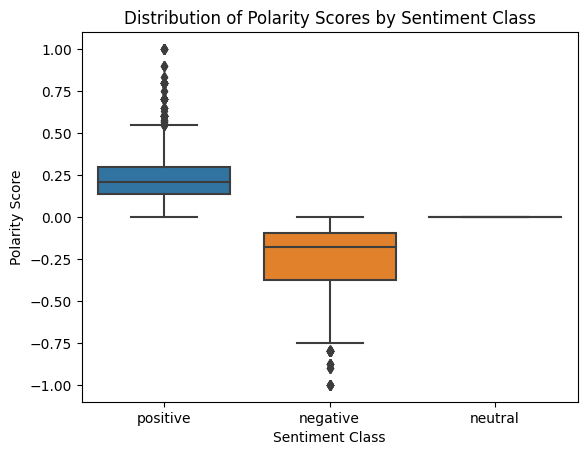

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment', y='polarity', data=SentimentDF)

plt.title('Distribution of Polarity Scores by Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Polarity Score')


Text(0, 0.5, 'Subjectivity Score')

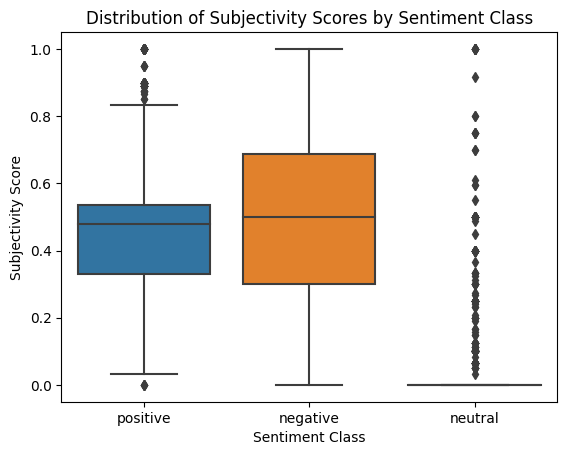

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment', y='subjectivity', data=SentimentDF)

plt.title('Distribution of Subjectivity Scores by Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Subjectivity Score')




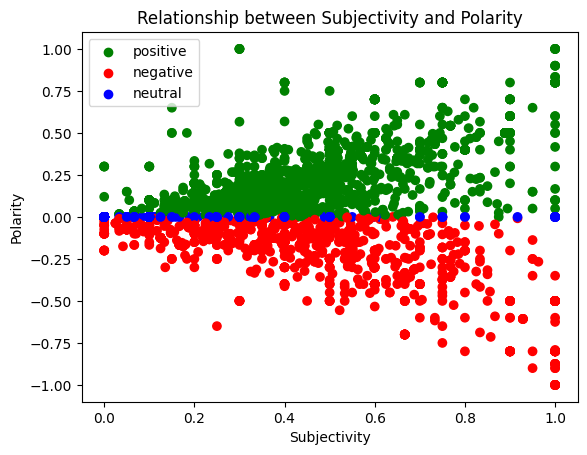

In [ ]:
# Create a scatter plot
colors = {'positive':'green', 'negative':'red', 'neutral':'blue'}
plt.scatter(SentimentDF['subjectivity'], SentimentDF['polarity'], c=SentimentDF['sentiment'].apply(lambda x: colors[x]))

for sentiment in colors:
    plt.scatter([], [], c=colors[sentiment], label=sentiment)

plt.title('Relationship between Subjectivity and Polarity')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')

plt.legend()
plt.show()



sentiment
negative     848
neutral     2168
positive    1984
dtype: int64


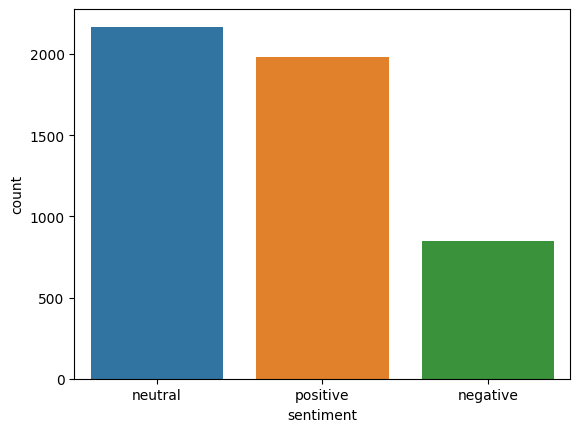

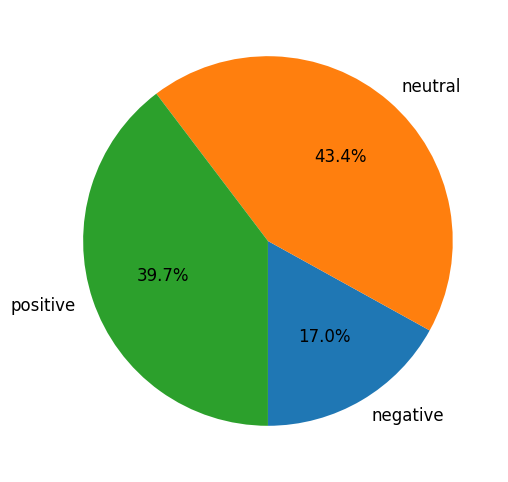

In [ ]:
sentiment_Cnt = pd.DataFrame(SentimentDF["sentiment"].value_counts())
sentiment_Cnt = sentiment_Cnt.rename({'sentiment': 'count'}, axis=1)
sentiment_Cnt["sentiment"] = sentiment_Cnt.index
    
sns.barplot(data= sentiment_Cnt, x="sentiment", y = "count") 

sentiment_counts_gr = SentimentDF.groupby(['sentiment']).size()
print (sentiment_counts_gr)


fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_gr.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
    
plt.show()

**Model Building**

In [20]:
SentimentDF.head()

,text,subjectivity,polarity,sentiment
0,drninaansari yeah destroy someon els hous righ...,0.267857,0.042857,positive
1,health care worker see bleak futur women afgha...,0.875000,-0.100000,negative
2,even un leav still need women afghanistan deli...,0.000000,0.000000,neutral
3,usafghanpeac meet also includ minor share prob...,0.200000,-0.050000,negative
4,meet mr thoma west us special repres afghanist...,0.571429,0.357143,positive


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# setting max_features to 5000 to get most repeated 5000 words in reviews
cv = CountVectorizer()

X = cv.fit_transform(SentimentDF.text).toarray()

#Importing label encoder
lb = LabelEncoder()

# positive = 2, negative = 0 , neutral=1
SentimentDF['sentiment_code'] = lb.fit_transform(SentimentDF.sentiment)

y = SentimentDF.iloc[:,-1].values

SentimentDF



,text,subjectivity,polarity,sentiment,sentiment_code
0,drninaansari yeah destroy someon els hous righ...,0.267857,0.042857,positive,2
1,health care worker see bleak futur women afgha...,0.875000,-0.100000,negative,0
2,even un leav still need women afghanistan deli...,0.000000,0.000000,neutral,1
3,usafghanpeac meet also includ minor share prob...,0.200000,-0.050000,negative,0
4,meet mr thoma west us special repres afghanist...,0.571429,0.357143,positive,2
...,...,...,...,...,...
4995,thedryhtscip well mayb speak behalf women mani...,0.250000,0.068182,positive,2
4996,today th januari gather westlak park seattl wa...,0.392857,0.142857,positive,2
4997,masoudeh kohestani human right activist street...,0.211905,0.095238,positive,2
4998,gemsofbollywood fundament problem frog view dr...,0.100000,0.000000,neutral,1


In [39]:
# importing train test split
from sklearn.model_selection import train_test_split

# converting X, y into train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=SentimentDF.sentiment_code)

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# converting X, y into train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=SentimentDF.sentiment_code)

# Create a naive Bayes classifier
clf = BernoulliNB()

# Train the classifier on the training set
clf.fit(train_X, train_Y)


# Use the trained classifier to make predictions on the testing set
predict = clf.predict(test_X)


# Evaluate the performance of the classifier

accuracy =  accuracy_score(predict, test_Y)
print("Accuracy:", accuracy)


Accuracy: 0.7406666666666667


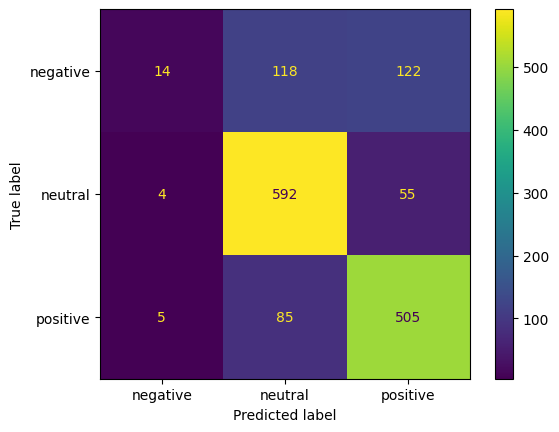

[[ 14 118 122]
 [  4 592  55]
 [  5  85 505]]


In [58]:
from sklearn import metrics
# positive = 2, negative = 0 , neutral=1
confusion_matrix = metrics.confusion_matrix(test_Y, predict, labels=[0, 1, 2])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['negative', 'neutral', 'positive'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()
print (confusion_matrix)